## <font color='#eb3483'> Deep dive into axes and figure level plots </font>
This section goes a little deeper into the differences of axis and figure level functions and some cool stuff you can do with them. Don't worry if you don't have time to go through this, you'll only ever need to use this stuff in really special graphs!

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

#Let's load in the tips data-set for some examples
tips = sns.load_dataset('tips')

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### <font color='#eb3483'> Axis Level Functions </font>

While Figure level plots are extremely convenient for data exploration they have one fundamental limitation. Figure level functions build their own figure from scratch. This means that they are not easily stackable so you can't easily combine multiple plots on top of one another. 

This is perhaps the main reason you might find yourself using axis level functions directly. Let's look at a quick example.

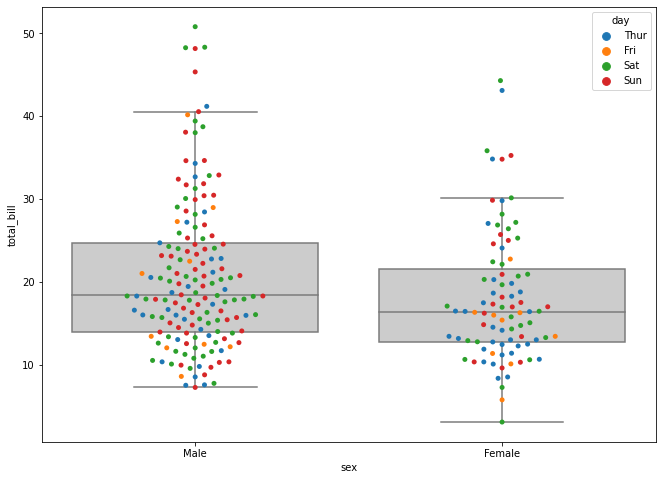

In [2]:
#We start by making a boxplot (seaborn will use a global plot behind the scenes)
sns.boxplot(x="sex", y="total_bill", data=tips, color=".8", showfliers=False)
#Now we're going to add a swarm plot to the current figure too
sns.swarmplot(x="sex", y="total_bill", hue="day", data=tips)
#We'll also change the plot size to be a little nicer (plt.gcf() just gets the current global plot we've been editing)
plt.gcf().set_size_inches(11, 8)

### <font color='#eb3483'> Quick knowledge check! </font>
1. Use the axes level functionality to create a line plot of table size versus tip (line plot will automatically fit an 'average' line with some error bars to show how variable each area of the line plot is - cool!), and add a scatter plot on top.

<AxesSubplot:xlabel='size', ylabel='tip'>

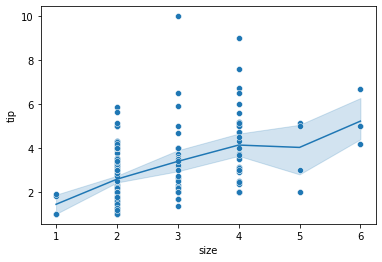

In [3]:
sns.lineplot(x="size", y="tip", data=tips)
sns.scatterplot(x="size", y="tip", data=tips)

### <font color='#eb3483'> Figure Level Functions (Facet Grid) </font>
We already saw how we can easily use figure level functions to generate faceted plots

In [ ]:
sns.relplot(x="total_bill", y="tip", data=tips, kind="scatter",
            hue="sex", 
            col='smoker', row='day',
            row_order=["Thur", "Fri", "Sat", 'Sun']
            )

This can also be done manually using **FacetGrid**. First we instantiate a facet 

In [ ]:
fg = sns.FacetGrid(tips,
            col="smoker", row="day", hue="sex", 
            row_order=["Thur", "Fri", "Sat", 'Sun']
            )
fg.map(plt.scatter, "total_bill", "tip")
plt.gcf().set_size_inches(11, 16)

The **FacetGrid** object contains pointers to all the axes so that we can manipulate them directly, if we wish

In [ ]:
fg.axes

So if we want to add an extra line to one of the subplots we can easily do:

In [ ]:
fg = sns.FacetGrid(tips,
            col="smoker", row="day", hue="sex", 
            row_order=["Thur", "Fri", "Sat", 'Sun']
            )
fg.map(plt.scatter, "total_bill", "tip")

# call methods directly on the axis object (these are functions from matplotlib)!
fg.axes[1][1].plot([10, 50], [2, 10], 'r-') 
fg.axes[1][1].set_title('Friday non-smokers')
fg.axes[1][1].legend()
plt.gcf().set_size_inches(11, 16)

### <font color='#eb3483'> Quick knowledge check! </font>
1. Manually (i.e. use the facetgrid function) to create a facet grid with gender on the rows and meal time on the columns (color by smoking) and plot total_bill vs tip. Try changing the order of genders too!

2. Change the titles of each graph to something a little nicer to read